In [130]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import scipy.stats as stats

In [131]:
similarity_scores_PACS = np.array([0.57, 0.61, 0.57, 0.89, 0.92, 0.89]) # PACS
similarity_scores_OH = np.array([0.70, 0.84, 0.64, 0.75, 0.63, 0.65]) # OfficeHome
similarity_scores_NICO = np.array([0.82, 0.86, 0.80, 0.73, 0.89, 0.80, 0.82, 0.72, 0.76, 0.73, 0.69, 0.85, 0.71, 0.70, 0.67]) #NICO
similarity_scores_DN = np.array([0.77, 0.69, 0.55, 0.69, 0.76, 0.68, 0.53, 0.68, 0.71, 0.52, 0.79, 0.84, 0.51, 0.51, 0.84]) #DomainNet
# similarity_scores = [3, 4, 2, 5, 4, 3, 2, 4, 3, 5]

similarity_scores_OH_art = np.array([0.70, 0.84, 0.64])
similarity_scores_OH_clip = np.array([0.70, 0.75, 0.63])
similarity_scores_OH_product = np.array([0.84, 0.75, 0.65])
similarity_scores_OH_real = np.array([0.64, 0.63, 0.65])

similarity_scores_NICO_autumn = np.array([0.80, 0.82, 0.72, 0.76, 0.82])
similarity_scores_NICO_dim = np.array([0.80, 0.73, 0.69, 0.85, 0.86])
similarity_scores_NICO_grass = np.array([0.82, 0.73, 0.71, 0.70, 0.80])
similarity_scores_NICO_outdoor = np.array([0.72, 0.69, 0.71, 0.67, 0.73])
similarity_scores_NICO_rock = np.array([0.76, 0.85, 0.70, 0.67, 0.89])
similarity_scores_NICO_water = np.array([0.82, 0.86, 0.80, 0.73, 0.89])



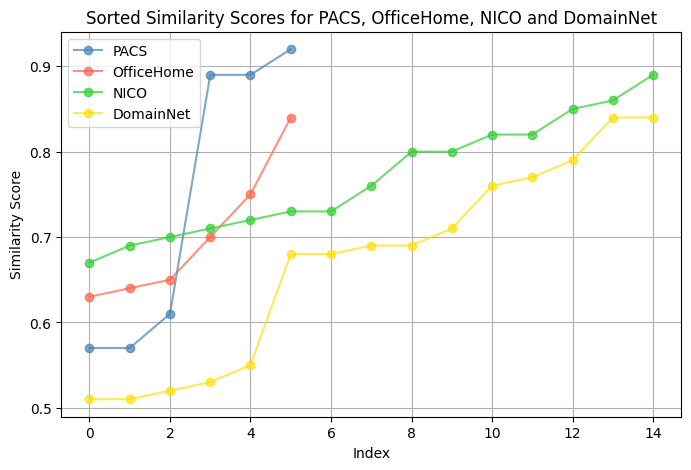

In [132]:
plt.figure(figsize=(8, 5))

# PACS
sorted_scores_PACS = np.sort(similarity_scores_PACS)
plt.plot(sorted_scores_PACS, marker='o', linestyle='-', color='#4682B4', alpha=0.7, label='PACS')
# for i, score in enumerate(sorted_scores_PACS):
#     plt.text(i, score, str(score), fontsize=10, ha='center', va='bottom', color='#7D7D7D')

# OfficeHome
sorted_scores_OH = np.sort(similarity_scores_OH)
plt.plot(sorted_scores_OH, marker='o', linestyle='-', color='#FF6347', alpha=0.7, label='OfficeHome')
# for i, score in enumerate(sorted_scores_OH):
#     plt.text(i, score, str(score), fontsize=10, ha='center', va='bottom', color='#7D7D7D')

# NICO
sorted_scores_NICO = np.sort(similarity_scores_NICO)
plt.plot(sorted_scores_NICO, marker='o', linestyle='-', color='#32CD32', alpha=0.7, label='NICO')
# for i, score in enumerate(sorted_scores_NICO):
#     plt.text(i, score, str(score), fontsize=10, ha='center', va='bottom', color='#7D7D7D')

# DomainNet
sorted_scores_DN = np.sort(similarity_scores_DN)
plt.plot(sorted_scores_DN, marker='o', linestyle='-', color='#FCE10A', alpha=0.7, label='DomainNet')
# for i, score in enumerate(sorted_scores_DN):
#     plt.text(i, score, str(score), fontsize=10, ha='center', va='bottom', color='#7D7D7D')

plt.title('Sorted Similarity Scores for PACS, OfficeHome, NICO and DomainNet')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.legend()
plt.grid(True)

plt.show()

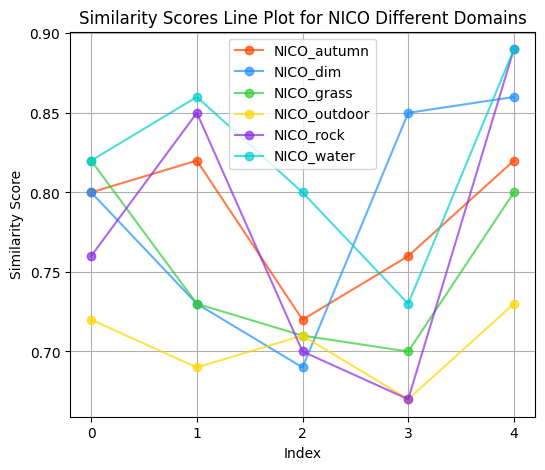

In [133]:
plt.figure(figsize=(6, 5))

# NICO_autumn
plt.plot(similarity_scores_NICO_autumn, marker='o', linestyle='-', color='#FF4500', alpha=0.7, label='NICO_autumn')

# NICO_dim
plt.plot(similarity_scores_NICO_dim, marker='o', linestyle='-', color='#1E90FF', alpha=0.7, label='NICO_dim')

# NICO_grass
plt.plot(similarity_scores_NICO_grass, marker='o', linestyle='-', color='#32CD32', alpha=0.7, label='NICO_grass')

# NICO_outdoor
plt.plot(similarity_scores_NICO_outdoor, marker='o', linestyle='-', color='#FFD700', alpha=0.7, label='NICO_outdoor')

# NICO_rock
plt.plot(similarity_scores_NICO_rock, marker='o', linestyle='-', color='#8A2BE2', alpha=0.7, label='NICO_rock')

# NICO_water
plt.plot(similarity_scores_NICO_water, marker='o', linestyle='-', color='#00CED1', alpha=0.7, label='NICO_water')

plt.xticks(np.arange(len(similarity_scores_NICO_autumn)), np.arange(len(similarity_scores_NICO_autumn)))

plt.title('Similarity Scores Line Plot for NICO Different Domains')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.legend()
plt.grid(True)

plt.show()

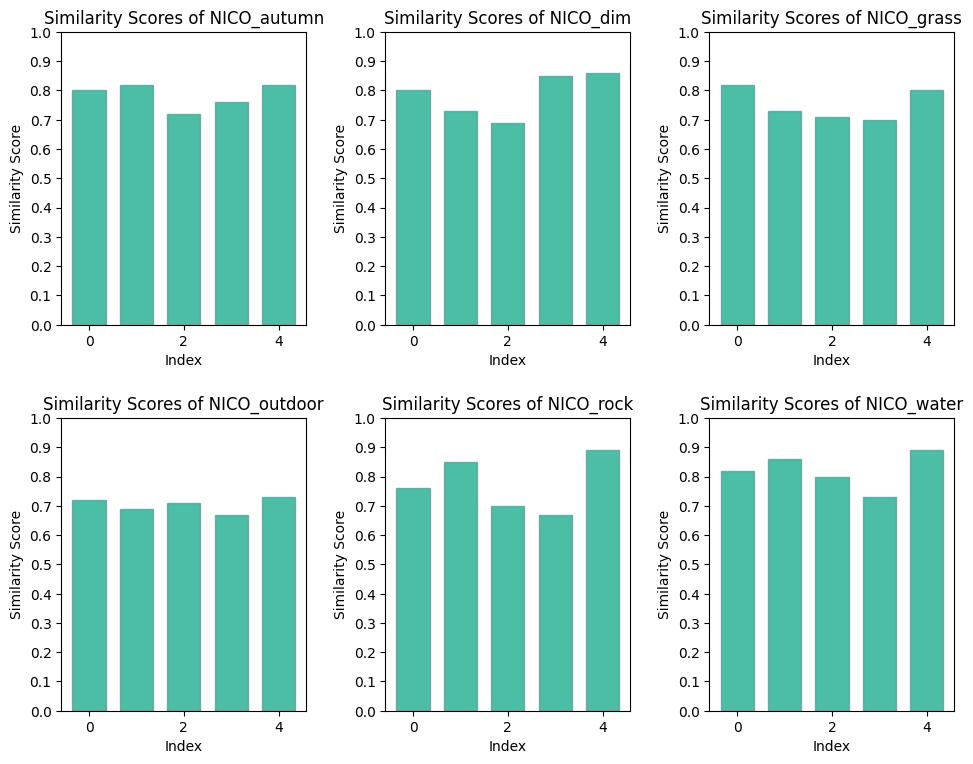

In [134]:
datasets_NICO = {
    "NICO_autumn": similarity_scores_NICO_autumn,
    "NICO_dim": similarity_scores_NICO_dim,
    "NICO_grass": similarity_scores_NICO_grass,
    "NICO_outdoor": similarity_scores_NICO_outdoor,
    "NICO_rock": similarity_scores_NICO_rock,
    "NICO_water": similarity_scores_NICO_water
}

plt.figure(figsize=(10, 8))
for i, (name, scores) in enumerate(datasets_NICO.items(), start=1):
    plt.subplot(2, 3, i)
    plt.bar(range(len(scores)), scores, width=0.7, alpha=0.7, color='#00A381', edgecolor='#5C9291')
    plt.xlabel('Index')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores of {name}')
    plt.ylim(0, 1) 
    plt.yticks(np.arange(0, 1.1, step=0.1))  
plt.tight_layout(pad=2.0)
plt.show()

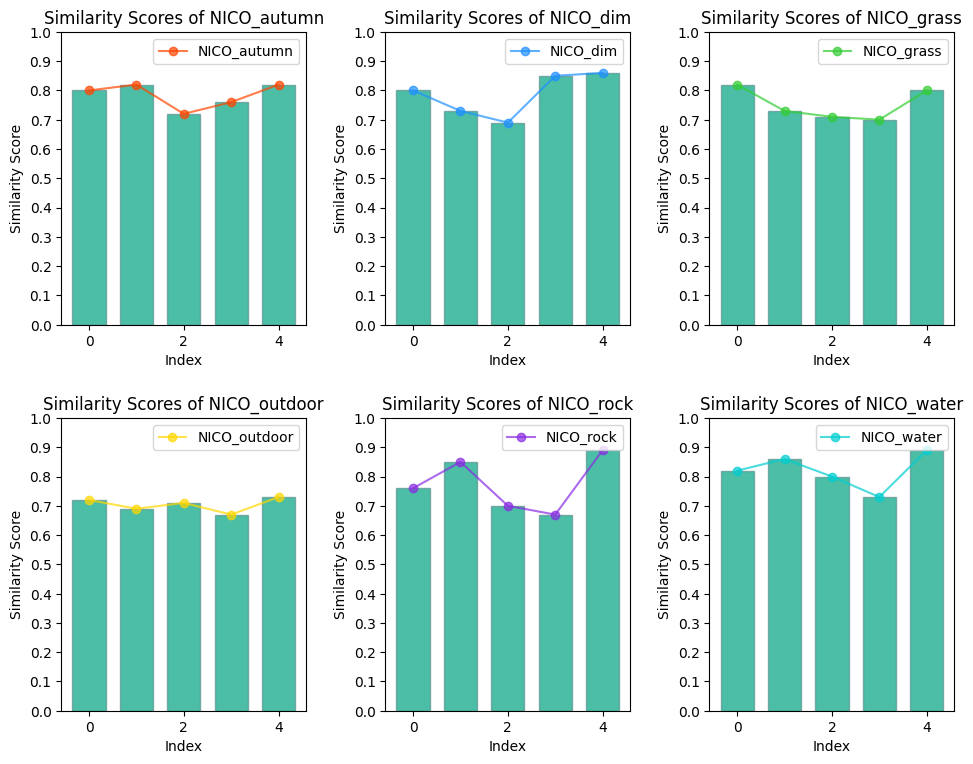

In [135]:
plt.figure(figsize=(10, 8))
colors = ['#FF4500', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2', '#00CED1']
for i, (name, scores) in enumerate(datasets_NICO.items(), start=1):
    plt.subplot(2, 3, i)
    plt.bar(range(len(scores)), scores, width=0.7, alpha=0.7, color='#00A381', edgecolor='#5C9291')
    plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color=colors[i-1], alpha=0.7, label=name)
    plt.xlabel('Index')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores of {name}')
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.legend()

plt.tight_layout(pad=2.0)
plt.show()

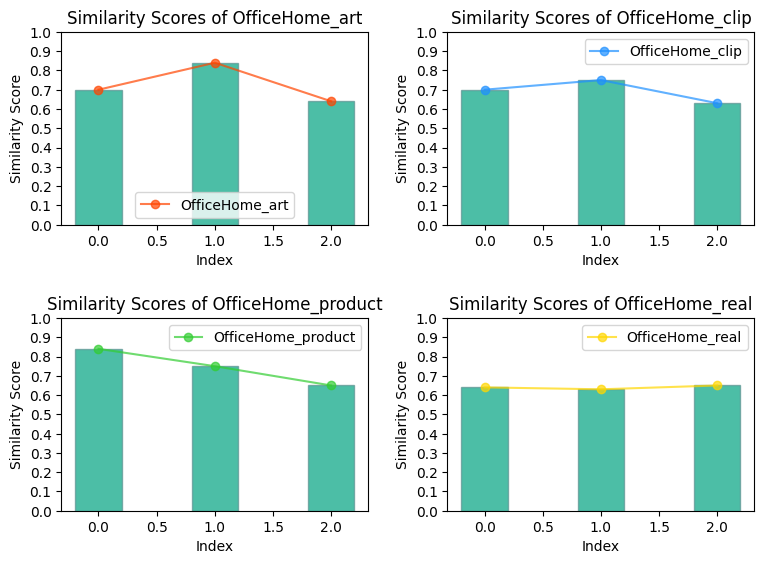

In [136]:
datasets_OH = {
    "OfficeHome_art": similarity_scores_OH_art,
    "OfficeHome_clip": similarity_scores_OH_clip,
    "OfficeHome_product": similarity_scores_OH_product,
    "OfficeHome_real": similarity_scores_OH_real
}

plt.figure(figsize=(8, 6))
colors = ['#FF4500', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2', '#00CED1']
for i, (name, scores) in enumerate(datasets_OH.items(), start=1):
    plt.subplot(2, 2, i)
    plt.bar(range(len(scores)), scores, width=0.4, alpha=0.7, color='#00A381', edgecolor='#5C9291')
    plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color=colors[i-1], alpha=0.7, label=name)
    plt.xlabel('Index')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores of {name}')
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.legend()

plt.tight_layout(pad=2.0)
plt.show()

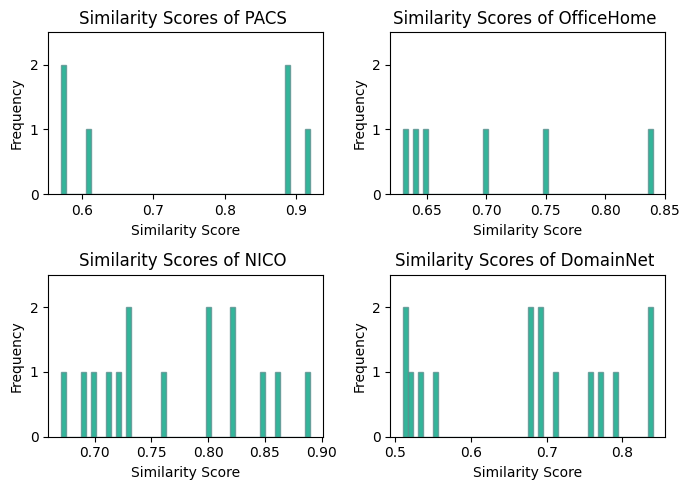

In [137]:
datasets = {
    "PACS": similarity_scores_PACS,
    "OfficeHome": similarity_scores_OH,
    "NICO": similarity_scores_NICO,
    "DomainNet": similarity_scores_DN
}

plt.figure(figsize=(7, 5))
for i, (name, scores) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    plt.hist(scores, bins=50, alpha=0.8, color='#00A381', edgecolor='#5C9291')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.title(f'Similarity Scores of {name} ')
    plt.ylim(0, 2.5)
    plt.yticks(np.arange(0, 3, step=1))
plt.tight_layout()
plt.show()

/tmp/ipykernel_2542322/3391534903.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores, shade=True, color='blue')
/tmp/ipykernel_2542322/3391534903.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores, shade=True, color='blue')
/tmp/ipykernel_2542322/3391534903.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores, shade=True, color='blue')
/tmp/ipykernel_2542322/3391534903.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores, shade=True, color='blue')


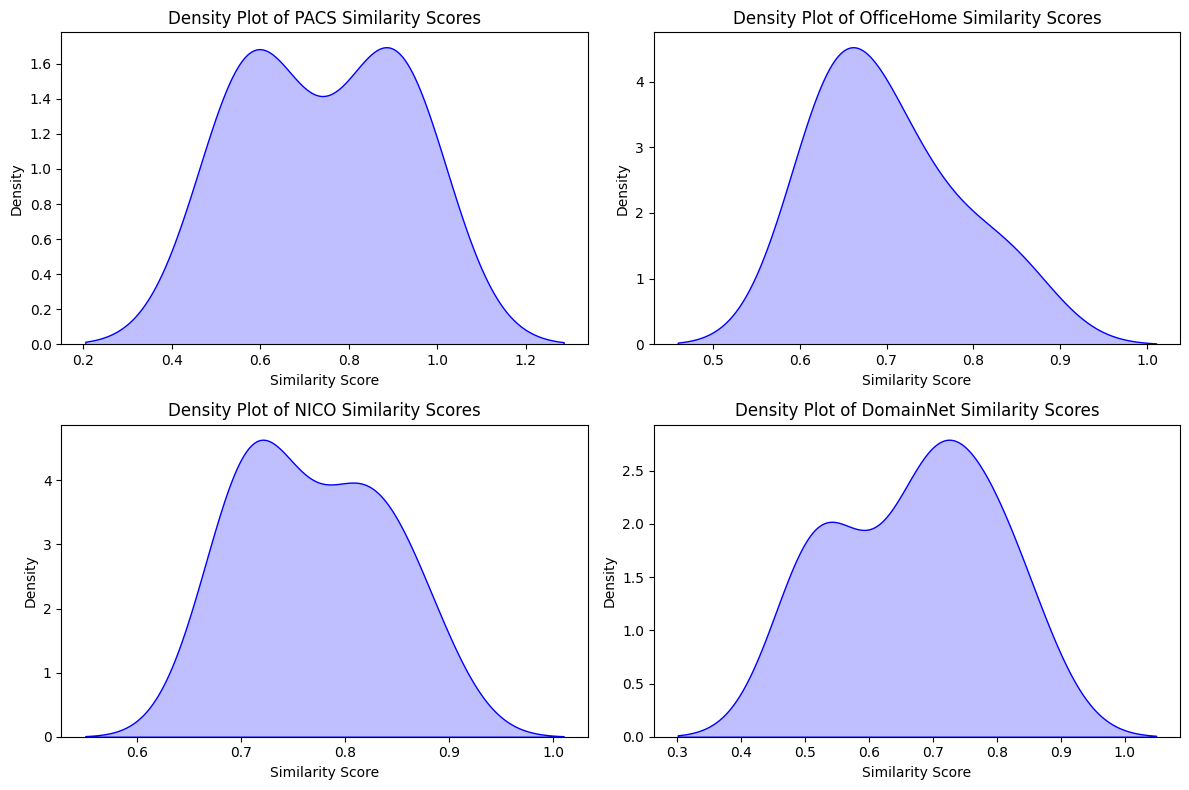

In [138]:
# Density plot
plt.figure(figsize=(12, 8))
for i, (name, scores) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    sns.kdeplot(scores, shade=True, color='blue')
    plt.xlabel('Similarity Score')
    plt.ylabel('Density')
    plt.title(f'Density Plot of {name} Similarity Scores')
plt.tight_layout()
plt.show()

In [139]:
for name, scores in datasets_NICO.items():
    print(f"\n{name} Similarity Scores Analysis:")
    
    # 计算相邻差值
    diffs = np.diff(np.sort(scores))
    print("Differences between consecutive scores:", diffs)
    
    # Shapiro-Wilk 检验: 越接近 1，数据越符合正态分布
    shapiro_stat, shapiro_p = stats.shapiro(scores)
    print(f"Shapiro-Wilk Test: Statistic={shapiro_stat}, p-value={shapiro_p}")
    
    # Anderson-Darling 检验: H0: 数据符合正态分布 
    anderson_result = stats.anderson(scores)
    print('Anderson-Darling Test:')
    print(f'Statistic: {anderson_result.statistic}')
    for i in range(len(anderson_result.critical_values)):
        sig_level, crit_val = anderson_result.significance_level[i], anderson_result.critical_values[i]
        print(f'At {sig_level}% significance level, critical value is {crit_val}')
        if anderson_result.statistic < crit_val:
            print(f'Data seems to be drawn from a normal distribution (fail to reject H0) at the {sig_level}% level')
        else:
            print(f'Data does not seem to be drawn from a normal distribution (reject H0) at the {sig_level}% level')


NICO_autumn Similarity Scores Analysis:
Differences between consecutive scores: [0.04 0.04 0.02 0.  ]
Shapiro-Wilk Test: Statistic=0.8713003396987915, p-value=0.2717289924621582
Anderson-Darling Test:
Statistic: 0.3592695212798773
At 15.0% significance level, critical value is 0.72
Data seems to be drawn from a normal distribution (fail to reject H0) at the 15.0% level
At 10.0% significance level, critical value is 0.82
Data seems to be drawn from a normal distribution (fail to reject H0) at the 10.0% level
At 5.0% significance level, critical value is 0.984
Data seems to be drawn from a normal distribution (fail to reject H0) at the 5.0% level
At 2.5% significance level, critical value is 1.148
Data seems to be drawn from a normal distribution (fail to reject H0) at the 2.5% level
At 1.0% significance level, critical value is 1.365
Data seems to be drawn from a normal distribution (fail to reject H0) at the 1.0% level

NICO_dim Similarity Scores Analysis:
Differences between consecut